In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
heart_data = pd.read_csv('data.csv')
print(heart_data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     70    1   4       130   322    0        2      109      0      2.4   
1     67    0   3       115   564    0        2      160      0      1.6   
2     57    1   2       124   261    0        0      141      0      0.3   
3     64    1   4       128   263    0        0      105      1      0.2   
4     74    0   2       120   269    0        2      121      1      0.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
265   52    1   3       172   199    1        0      162      0      0.5   
266   44    1   2       120   263    0        0      173      0      0.0   
267   56    0   2       140   294    0        2      153      0      1.3   
268   57    1   4       140   192    0        0      148      0      0.4   
269   67    1   4       160   286    0        2      108      1      1.5   

     slope  ca  thal  target  
0        2   3     3       2  
1        2   0     7     

In [3]:
#scaling the data 
heart_data['target'].replace({1:0, 2:1}, inplace=True)

In [4]:
print(heart_data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     70    1   4       130   322    0        2      109      0      2.4   
1     67    0   3       115   564    0        2      160      0      1.6   
2     57    1   2       124   261    0        0      141      0      0.3   
3     64    1   4       128   263    0        0      105      1      0.2   
4     74    0   2       120   269    0        2      121      1      0.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
265   52    1   3       172   199    1        0      162      0      0.5   
266   44    1   2       120   263    0        0      173      0      0.0   
267   56    0   2       140   294    0        2      153      0      1.3   
268   57    1   4       140   192    0        0      148      0      0.4   
269   67    1   4       160   286    0        2      108      1      1.5   

     slope  ca  thal  target  
0        2   3     3       1  
1        2   0     7     

In [5]:
heart_data['target'].value_counts()

0    150
1    120
Name: target, dtype: int64

In [6]:
X = heart_data.drop(columns='target')
Y = heart_data['target']

In [7]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     70    1   4       130   322    0        2      109      0      2.4   
1     67    0   3       115   564    0        2      160      0      1.6   
2     57    1   2       124   261    0        0      141      0      0.3   
3     64    1   4       128   263    0        0      105      1      0.2   
4     74    0   2       120   269    0        2      121      1      0.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
265   52    1   3       172   199    1        0      162      0      0.5   
266   44    1   2       120   263    0        0      173      0      0.0   
267   56    0   2       140   294    0        2      153      0      1.3   
268   57    1   4       140   192    0        0      148      0      0.4   
269   67    1   4       160   286    0        2      108      1      1.5   

     slope  ca  thal  
0        2   3     3  
1        2   0     7  
2        1   0    

In [8]:
print(Y)

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: target, Length: 270, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y, random_state=1)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(270, 13) (189, 13) (81, 13)


In [13]:
#model selection
model = DecisionTreeClassifier(random_state = 10)

In [16]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=10)

In [17]:
hist = model.score(X_train, Y_train)

print (hist)

1.0


In [20]:
history = model.score(X_test, Y_test)

print(history)

0.7777777777777778


In [21]:
pred = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [23]:
confusematrix = confusion_matrix(pred, Y_test)
print(confusematrix)

[[36  9]
 [ 9 27]]


<AxesSubplot:>

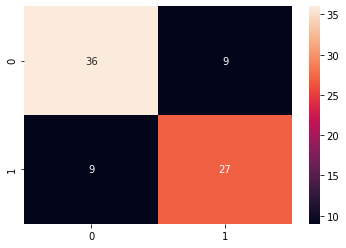

In [24]:
sns.heatmap(confusematrix, annot=True)

In [25]:
from sklearn.metrics import classification_report

In [26]:
call = classification_report(pred, Y_test)
print(call)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        45
           1       0.75      0.75      0.75        36

    accuracy                           0.78        81
   macro avg       0.78      0.78      0.78        81
weighted avg       0.78      0.78      0.78        81

